In [2]:
#importing the libraries required 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [11]:
#loading the dataset 
data=pd.read_csv("online_retail_II.csv", encoding='unicode_escape')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


HANDLING MISSING DATA 

In [12]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [14]:
#dropping null values 
dataset1=data.dropna()

In [15]:
dataset1.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

HANDLING NEGATIVE VALUES IF ANY 

In [16]:
dataset1[dataset1['Quantity']< 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [18]:
#removing negative value 
dataset2=dataset1[dataset1['Quantity']>= 0]
dataset2[dataset1['Quantity']< 0]

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11588\3818967786.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset2[dataset1['Quantity']< 0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


Handling Duplicate Data

In [19]:
dataset2.duplicated().sum()

5192

In [20]:
dataset2.drop_duplicates(inplace=True)

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11588\1877747665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.drop_duplicates(inplace=True)


In [21]:
#running again to check 
dataset2.duplicated().sum()

0

Now if the look at the Column "StockCode" there are entries other than numbers so we will remove them 

In [22]:
#the stock code is indicated by 5 digit number
dataset_clean = dataset2[dataset2['StockCode'].str.match(r'^\d{5}$')]

Saving the cleaned dataset

In [24]:
dataset_clean.to_csv("retailData_clean.csv")

EDA (Exploratory Data Analysis)

**OBJECTIVES**
1.What products do consumers buy most?
2.Which product is the most expensive?
3.Which product has the highest total sales?
4.Which countries do most customers come from?
5.How many products were cancelled?

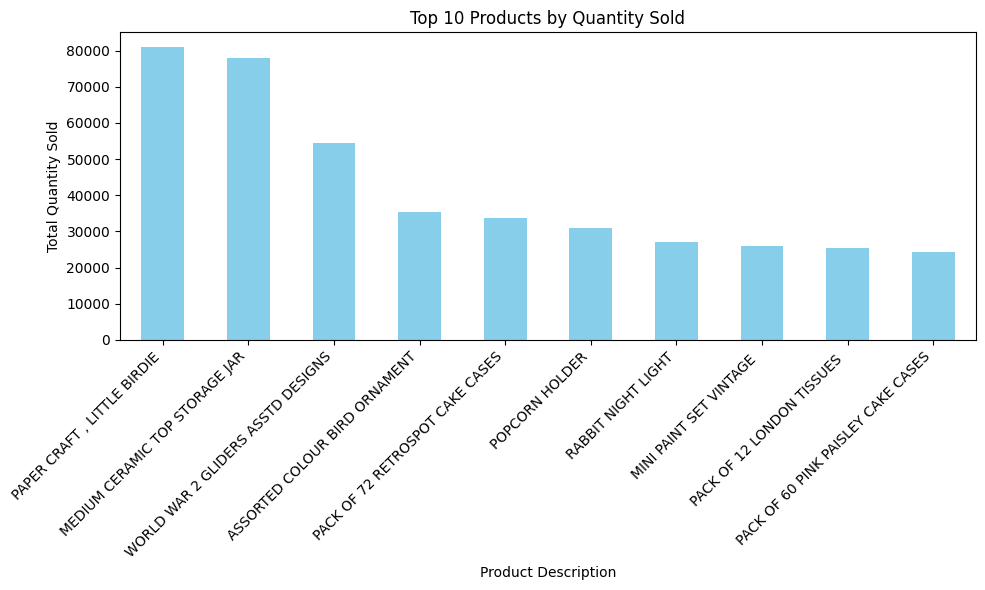

In [25]:
#what products do customers buy most 
# Grouping by 'description' and summing up the 'quantity' for each product
product_quantity = dataset_clean.groupby('Description')['Quantity'].sum()

# Sorting the products by quantity in descending order
product_quantity_sorted = product_quantity.sort_values(ascending=False)

# Taking the top 10 products (you can adjust this number as needed)
top_products = product_quantity_sorted.head(10)

# Plotting the top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11588\3091466889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['total_revenue'] = dataset_clean['Quantity'] * dataset_clean['Price']
C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11588\3091466889.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_revenue_sorted.head(10), x='Description', y='total_revenue', palette='muted')


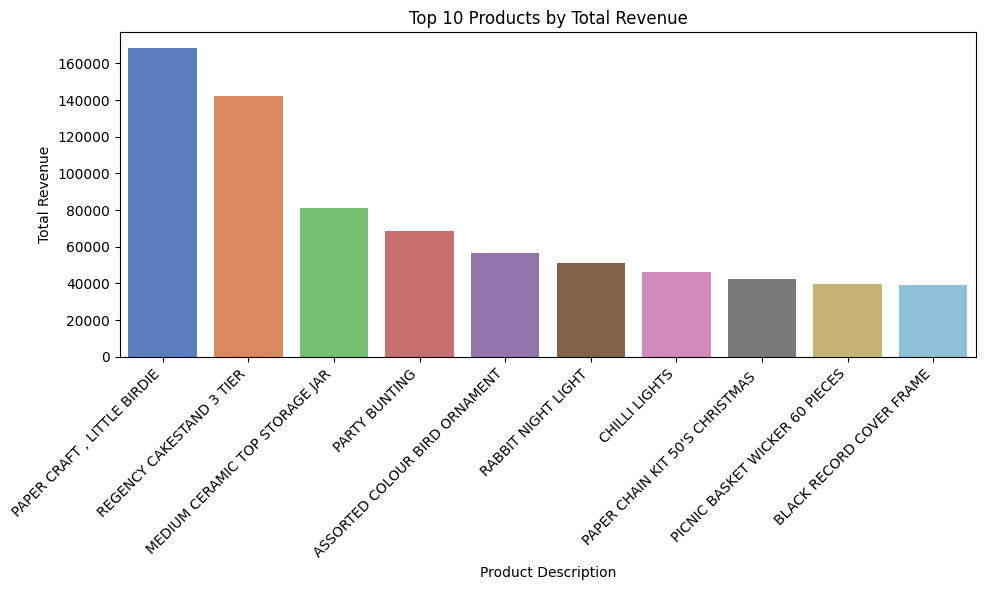

In [27]:
#which product is more expensive
# Calculate total revenue for each product
dataset_clean['total_revenue'] = dataset_clean['Quantity'] * dataset_clean['Price']

# Grouping by 'description' and summing up the total revenue for each product
product_revenue = dataset_clean.groupby('Description')['total_revenue'].sum()

# Sorting the products by total revenue in descending order
product_revenue_sorted = product_revenue.sort_values(ascending=False)

# Resetting index to have 'description' as a column
product_revenue_sorted = product_revenue_sorted.reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=product_revenue_sorted.head(10), x='Description', y='total_revenue', palette='muted')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Nexgen\AppData\Local\Temp\ipykernel_11588\1093129793.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_count_sorted.head(10), x='Country', y='Customer ID', palette='muted')


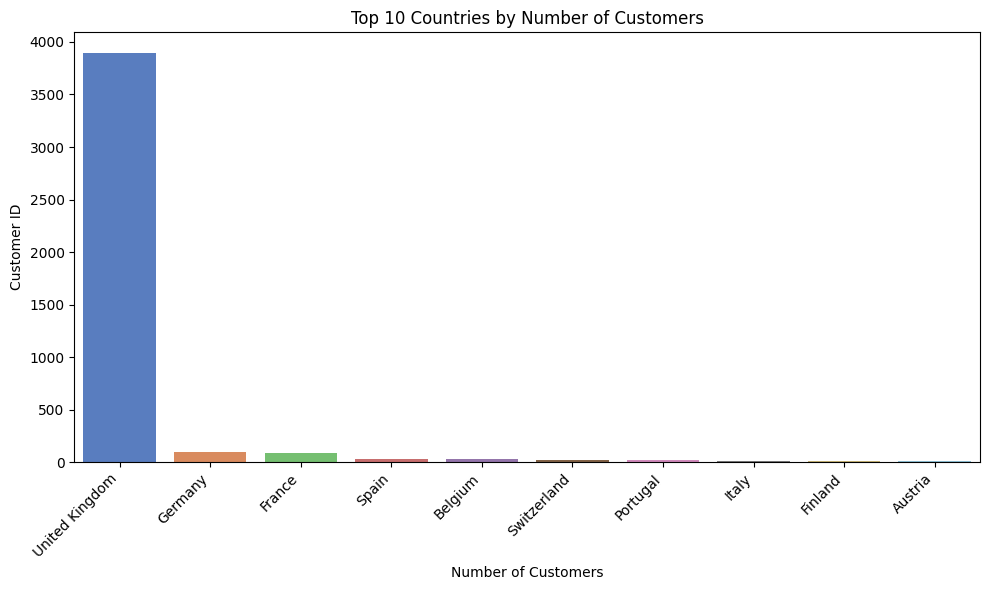

In [28]:
#which countries do most customers come from 
# Grouping by 'country' and counting the number of unique customers in each country
customer_count_by_country = dataset_clean.groupby('Country')['Customer ID'].nunique().reset_index()

# Sorting the countries by the number of unique customers in descending order
customer_count_sorted = customer_count_by_country.sort_values(by='Customer ID', ascending=False)

# Plotting using Seaborn's bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_count_sorted.head(10), x='Country', y='Customer ID', palette='muted')
plt.title('Top 10 Countries by Number of Customers')
plt.xlabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()